In [1]:
import plotly.io as pio
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# pio.renderers.default = 'browser'

In [2]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6, 4)})
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import squarify

In [3]:
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
from imblearn.over_sampling import SMOTE

### Data preprocessing

###### Data Description
income : Income of the customer

age : Age of the customer

experience : Work experience of the customer in years

profession : Profession of the customer

married : Whether married or single

house_ownership : House ownership status of the customer

car_ownership : Whether the customer owns a car or not

risk_flag : Whether the customer defaulted on the loan or not

currentjobyears : Years of experience in the current job of customer

currenthouseyears : Number of years in the current residence

city : City of residence

state : State of residence

In [5]:
loan_data = pd.read_csv('data/Data_Loan.csv')
loan_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [32]:
len(loan_data)

252000

In [33]:
loan_data.drop_duplicates(keep=False,inplace=True)
len(loan_data)

252000

In [34]:
miss = loan_data.isna().sum()
miss = miss[miss>0]
print(f"Các dữ liệu thiếu:\n{miss}")
print(f"Số lượng cột có dữ liệu thiếu {len(miss)}")

Các dữ liệu thiếu:
Series([], dtype: int64)
Số lượng cột có dữ liệu thiếu 0


In [35]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.00,50.0,65.00,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


### Basic EDA

In [10]:
cols = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']

In [11]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

# for i in cols:
#     loan_data[i]= le.fit_transform(loan_data[i])

In [12]:
loan_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [36]:
def hist_RF(data='Income'):
#     with wOut0:
#         wOut0.clear_output()
    fig = plt.figure(figsize=(12,10))
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    sns.set_theme(context='talk', style='white', palette='tab10')
    sns.histplot(data=loan_data, x=data, hue='Risk_Flag', bins=50, multiple="stack", ax=ax1)
    sns.kdeplot(data=loan_data, x=data, hue='Risk_Flag', shade=True, ax=ax2)
    plt.tight_layout()
    plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20980\2316025597.py:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




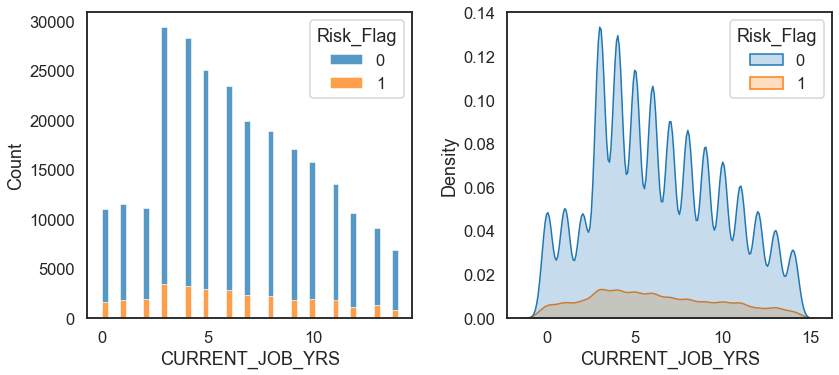

In [14]:
wLabel0 = widgets.Label(value='Phân bố dạng histogram của data dựa trên Risk-Flag')
display(wLabel0)
wRB = widgets.RadioButtons(options=['Age','Income','Experience','CURRENT_JOB_YRS'])
# wOut0 = widgets.Output(layout={'border': '1px solid black'})
# wKQ = widgets.interact(hist_RF, data=wRB)
# display(wOut0)

def button_click(bc):
    clear_output()
    display(widgets.HBox([wRB, bc]))
    hist_RF(wRB.value)

bc = widgets.Button(description='Draw', icon='check', button_style='danger')
bc.on_click(button_click)
display(widgets.HBox([wRB, bc]))

In [37]:
pro_RF = pd.DataFrame(data=loan_data.groupby(['Risk_Flag','Profession'])['Risk_Flag'].count().sort_values(ascending=False))
pro_RF.columns = ['counts']
pro_RF = pro_RF.reset_index()
pro_RF

,Risk_Flag,Profession,counts
0,0,Physician,5247
1,0,Statistician,5135
2,0,Web_designer,4808
3,0,Drafter,4754
4,0,Psychologist,4733
...,...,...,...
97,1,Designer,502
98,1,Engineer,478
99,1,Economist,454
100,1,Petroleum_Engineer,429


In [38]:
pro_RF = pd.DataFrame(data=loan_data.groupby(['Risk_Flag','Profession'])['Risk_Flag'].count().sort_values(ascending=False))
pro_RF.columns = ['counts']
pro_RF = pro_RF.reset_index()
def top_profession(N=10):
    profession = pd.DataFrame(data=loan_data['Profession'].value_counts().reset_index())
    profession.columns = ['Jobs','counts']
    profession = profession[0:N]
#     fig = plt.figure(figsize=(15,4))
#     ax = fig.add_subplot(1,1,1)
#     squarify.plot(sizes=profession['counts'],label=profession['Jobs'],ax=ax, color=sns.color_palette("Paired")
#         )
#     plt.show()
    
    parent = []
    for i in range(len(profession['counts'])):
        parent.append("Top loan profession")
  
    fig1 = px.treemap(
        names = profession['Jobs'],
        parents = parent,
        values = profession['counts'],
        )
    fig1.update_traces(root_color="tomato")
    fig1.update_layout(margin = dict(t=50, l=25, r=25, b=25))
    fig1.show()
    
    fig = make_subplots(rows=1, cols=2, 
                        subplot_titles=("Top Risk Profession", "Top Non-Risk Profession"), 
                        column_widths=[0.6, 0.4],
                        specs=[[{"type": "xy"}, {"type": "xy"}]]
                       )
    Bar_risk = go.Bar(x=pro_RF[51:51+N]['Profession'], y =pro_RF[51:51+N]['counts'],
                         width=0.5,showlegend=False)
    Bar_nonrisk = go.Bar(x=pro_RF[0:N]['Profession'], y=pro_RF[0:N]['counts'],
                         width=0.5,showlegend=False)
    fig.add_trace(Bar_risk, row=1, col=1)
    fig.add_trace(Bar_nonrisk, row=1, col=2)
    fig.show()

In [17]:
wLabel2 = widgets.Label(value='Top Risk-Non risk Profession')
display(wLabel2)
wInt = widgets.IntSlider(value=3, min=0, max=51, step=1)
wOut = widgets.Output(layout={'border': '1px solid black'})
wKQ = widgets.interact(top_profession, N=wInt)

Label(value='Top Risk-Non risk Profession')

interactive(children=(IntSlider(value=3, description='N', max=51), Output()), _dom_classes=('widget-interact',…

### Phân tích dữ liệu đa biến

In [39]:
def Profession(Job='Software_Developer'):
    fig = plt.figure(figsize=(13,11))
    ax1 = fig.add_subplot(2,2,3)
    ax2 = fig.add_subplot(2,2,4)
    df = loan_data.groupby(['Profession']).get_group(Job)
    sns.set_theme(context='talk', style='white', palette='tab10')
    sns.histplot(data=df, x='Income', hue='Risk_Flag', bins=50, multiple="stack", ax=ax1, color=sns.set_palette('Set1'))
    sns.histplot(data=df, x='Experience', hue='Risk_Flag', multiple="stack", ax=ax2, color=sns.set_palette('Set2')) 
    plt.tight_layout()
    plt.show()
    
    
    fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=("Tình trạng sở hữu nhà", "Tình trạng hôn nhân"),
                     specs=[[{"type": "pie"}, {"type": "pie"}]]
                   )

    df_H = pd.DataFrame(index = df.index)
    df_H['House ownership'] = 'House ownership'
    df_H['Family Status'] = 'Family Status'
    df = pd.concat((df,df_H), axis=1)
    
    fig_H = px.sunburst(df, path=['House ownership','House_Ownership', 'Risk_Flag'], color_discrete_sequence=px.colors.qualitative.Dark24)
    fig2=go.Sunburst(
    branchvalues='total',
    ids=fig_H['data'][0]['ids'].tolist(),
    labels=fig_H['data'][0]['labels'].tolist(),
    parents=fig_H['data'][0]['parents'].tolist(),
    values=fig_H['data'][0]['values'].tolist()
    )
    
    fig_F = px.sunburst(df, path=['Family Status','Married/Single', 'Risk_Flag'], color_discrete_sequence=px.colors.qualitative.Dark2)
    fig3=go.Sunburst(
    branchvalues='total',
    ids=fig_F['data'][0]['ids'].tolist(),
    labels=fig_F['data'][0]['labels'].tolist(),
    parents=fig_F['data'][0]['parents'].tolist(),
    values=fig_F['data'][0]['values'].tolist()
    )
    
    fig.add_trace(fig2, row=1, col=1)
    fig.add_trace(fig3, row=1, col=2)
    fig.show();

In [40]:
wLabel1 = widgets.Label(value='Risk_Flag theo nghề nghiệp + tình trạng gia đình và sở hữu nhà cửa')
display(wLabel1)
wCB = widgets.Dropdown(
                       options=list(pd.unique(loan_data['Profession'])))
# wOut1 = widgets.Output(layout={'border': '1px solid black'})
wKQ = widgets.interact(Profession, Job=wCB);

Label(value='Risk_Flag theo nghề nghiệp + tình trạng gia đình và sở hữu nhà cửa')

interactive(children=(Dropdown(description='Job', options=('Mechanical_engineer', 'Software_Developer', 'Techn…

In [20]:
state = pd.DataFrame(loan_data['STATE'].value_counts().reset_index())
state.columns = ['State','Counts']

toado = pd.DataFrame({'State':['Uttar_Pradesh','Maharashtra',
                              'Andhra_Pradesh','West_Bengal',
                              'Bihar','Tamil_Nadu',
                              'Madhya_Pradesh','Karnataka',
                              'Gujarat','Rajasthan'],
                     'lat':[26.8467,19.7515,15.9129,22.9868,
                           25.0961,11.1271,22.9734,15.3173,
                           22.2587,27.0238],
                     'lon':[80.9462,75.7139,79.7400,87.8550,
                           85.3131,78.6569,78.6569,75.7139,
                           71.1924,74.2179]})
state = pd.merge(state[0:10], toado, on='State')

figMap = px.scatter_mapbox(state, lat="lat", lon="lon",
                        hover_name="State", 
                        hover_data=["Counts"],
                        size="Counts",
                        zoom=4, height=400, width=250,
                        color=state['State'],
                        color_discrete_sequence=px.colors.qualitative.Vivid
                       )
figMap.update_layout(mapbox_style="stamen-terrain")
figMap.update_layout(mapbox_style="open-street-map")

figMap.update_geos(fitbounds="locations", 
                showcountries=True,
                countrycolor="Blue")

figMap.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, showlegend=False)
figMap.show()

In [41]:

def state_RF2(state='Uttar_Pradesh'):
    with wOutput:
        wOutput.clear_output()
        data_state = loan_data.groupby(['STATE']).get_group(state)
        Age = pd.DataFrame(data_state.groupby(['Risk_Flag','Age'])['Risk_Flag'].count())
        Age.columns = ['count']
        Age = Age.reset_index()
        Age_RF = pd.DataFrame(Age.groupby('Risk_Flag')['count'].sum()).reset_index()
        x0 = Age[Age['Risk_Flag']==0]
        x1 = Age[Age['Risk_Flag']==1]

        fig = make_subplots(rows=1, cols=2, 
                                subplot_titles=('Phân bố tuổi tác',"Biểu đồ so sánh theo tuổi"),
                                specs=[[{"type": "bar"}, {"type": "pie"}]]
                               )


        colors = ['darkorange','limegreen']
        trace3 = go.Pie(labels=Age_RF['Risk_Flag'], values=Age_RF['count'], hole=0.3, pull=[0.1,0],marker=dict(colors=colors), showlegend=False)
        fig.add_trace(trace3, 1, 2)

        trace1 = go.Bar(name='RF-1', x=pd.unique(Age['Age']), y=x1['count'], text='1',marker=dict(color="seagreen"))
        trace2 = go.Bar(name='RF-0', x=pd.unique(Age['Age']), y=x0['count'], text='0',marker=dict(color="darkorange"))
        fig.append_trace(trace1, 1, 1)
        fig.append_trace(trace2,1,1)
        fig.update_layout(barmode='stack',width=750, height=450, 
    #                       margin={"r":0,"t":0,"l":0,"b":0},
                          title=f'BIỂU ĐỒ SO SÁNH Risk-Flag TẠI: {state}')
        fig.show()

        x0 = data_state[data_state['Risk_Flag']==0]
        x1 = data_state[data_state['Risk_Flag']==1]
        x0 = pd.DataFrame(x0['Income'])
        x1 = pd.DataFrame(x1['Income'])
        fig = go.Figure()
        fig.add_trace(go.Histogram(x=x0['Income'],marker=dict(color="deepskyblue"), name='Risk-Flag = 0'))
        fig.add_trace(go.Histogram(x=x1['Income'],marker=dict(color="crimson"), name='Risk-Flag = 1'))
        fig.update_layout(barmode='overlay',title_text='Phân bố thu nhập cá nhân theo Risk_Flag',width=800, height=400)
        # Reduce opacity to see both histograms
        fig.update_traces(opacity=0.75)
        fig.show()

In [43]:
bState = widgets.Select(description='Chọn State',
                           options=list(state['State']),
                           style = {'description_width': 'initial'}
                          )
mapWidget = go.FigureWidget(figMap)
box1 = widgets.VBox([mapWidget, bState])

wOutput = widgets.Output(layout={'border': '0px solid black'})

labelLayout = {'border': '1px solid black', 'background':'green',
               'justify_content':'center', 'display':'flex'}
wLabel = widgets.Label(value='State', layout=labelLayout)

box2 = widgets.VBox([wLabel, wOutput])
box = widgets.HBox([box1, box2])
display(box)
a = widgets.interactive(state_RF2, state=bState)

    'data': [{'customdata': array([[28400]], dtype=int64),
      …

### Dự đoán Risk Flag

In [44]:
RF = pd.DataFrame(loan_data.groupby(['Risk_Flag'])['Risk_Flag'].count())
RF.columns = ['count']
RF = RF.reset_index()
RF = pd.DataFrame(RF.groupby('Risk_Flag')['count'].sum()).reset_index()
colors = ['darkorange','limegreen']
fig = px.pie(RF, values='count', names='Risk_Flag', hole=0.3)
fig.show()

In [45]:
import csv
file_data = 'data/Data_Loan.csv'
row_list = []
with open (file_data, newline='',encoding='utf8') as input_file:
    data_file =  csv.reader(input_file, delimiter=',')
    header = next(data_file)
    for row in data_file:
        row_list.append(row)
row_list = np.array(row_list)
row_list = row_list.astype(str)
row_list

array([['1', '1303834', '23', ..., '3', '13', '0'],
       ['2', '7574516', '40', ..., '9', '13', '0'],
       ['3', '3991815', '66', ..., '4', '10', '0'],
       ...,
       ['251998', '4522448', '46', ..., '7', '12', '0'],
       ['251999', '6507128', '45', ..., '0', '10', '0'],
       ['252000', '9070230', '70', ..., '7', '11', '0']], dtype='<U28')

In [47]:
LE = LabelEncoder()
# print(raw_data)
# X = np.stack([LE.fit_transform(col) for col in raw_data.T[0:6]], axis=1)
X = np.stack([LE.fit_transform(row_list.T[i]) for i in range(1,12) if (i != 8)], axis=1)
Y = LE.fit_transform(row_list[:,12])
print(X.shape)
print(Y.shape)
X[0]

(252000, 10)
(252000,)


array([1386,    2,   14,    1,    2,    0,   33,   13,    8,    3],
      dtype=int64)

In [48]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,
                                               test_size=0.2,
                                               random_state=0)

print(Xtrain.shape,Xtest.shape)
print(Ytrain.shape,Ytest.shape)

(201600, 10) (50400, 10)
(201600,) (50400,)


In [50]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(Xtrain, Ytrain)
print('Training accuracy:',LogReg.score(Xtrain,Ytrain))
print('Testing accuracy:',LogReg.score(Xtest,Ytest))

Training accuracy: 0.8767113095238095
Testing accuracy: 0.8781547619047619


In [51]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

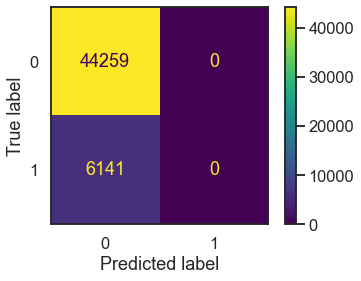

In [52]:
predictions1 = LogReg.predict(Xtest)
cm1 = confusion_matrix(Ytest, predictions1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()

In [30]:
def Predict_RF(Index=0):
    with wOutput4:
        wOutput4.clear_output()
        ds_loai = ['No risk', 'Risk']
        encode =  LogReg.predict([Xtest[int(Index)]])[0]
        wOutput4.clear_output()
        print(f"Mã hóa: {encode} - Ý nghĩa: {ds_loai[encode]}")
        print(f"Mã hóa: {Ytest[int(Index)]} - Ý nghĩa: {ds_loai[Ytest[int(Index)]]}")

In [31]:
wLabel4 = widgets.Label(value='Dự đoán RF, Nhập 1 số từ 0 đến 50399:')
display(wLabel4)
wOutput4 = widgets.Output(layout={'border': '1px solid black'})
wText4 = widgets.Text(value='0',step=1,description='0-50399')
# wOut1 = widgets.Output(layout={'border': '1px solid black'})
wKQ = widgets.interactive(Predict_RF, Index=wText4)
display(wText4)
display(wOutput4)

Label(value='Dự đoán RF, Nhập 1 số từ 0 đến 50399:')

Text(value='0', description='0-50399')

Output(layout=Layout(border='1px solid black'))

In [33]:
for i in range(len(Ytest)):
    if Ytest[i]==1:
        print(i)

3
5
20
22
23
33
37
57
63
77
89
95
98
102
107
127
129
130
131
133
162
163
166
178
181
187
188
189
193
201
202
208
213
216
223
241
252
253
264
265
268
308
315
325
327
330
341
346
348
359
367
374
402
405
416
426
430
439
457
466
476
477
479
482
489
497
498
499
512
516
528
552
566
574
577
581
582
586
596
606
610
625
638
643
644
675
678
682
692
695
707
711
723
734
738
762
765
768
769
772
780
796
803
804
810
811
821
824
826
833
852
857
863
893
897
916
936
941
948
959
973
975
981
983
985
1005
1013
1014
1045
1046
1063
1071
1082
1091
1096
1114
1121
1123
1125
1148
1157
1190
1193
1199
1207
1209
1214
1226
1232
1242
1245
1256
1259
1260
1264
1298
1317
1327
1330
1337
1356
1358
1359
1366
1370
1379
1380
1388
1396
1402
1410
1413
1418
1431
1433
1469
1474
1477
1485
1499
1510
1515
1523
1547
1548
1553
1554
1574
1595
1604
1608
1612
1615
1621
1629
1630
1638
1640
1645
1678
1688
1694
1710
1723
1724
1729
1736
1739
1748
1749
1766
1777
1784
1807
1825
1828
1836
1848
1852
1855
1857
1867
1878
1882
1884
1888
1896
1904


16017
16022
16032
16033
16037
16044
16052
16061
16077
16079
16095
16103
16111
16118
16152
16161
16176
16179
16180
16182
16183
16193
16210
16219
16231
16232
16235
16252
16254
16257
16259
16261
16269
16270
16274
16278
16288
16295
16305
16318
16323
16342
16344
16351
16374
16375
16378
16382
16394
16405
16444
16455
16457
16468
16503
16504
16539
16544
16548
16551
16558
16592
16605
16615
16634
16637
16662
16670
16673
16677
16695
16705
16712
16715
16716
16717
16754
16764
16766
16776
16791
16798
16817
16827
16828
16832
16844
16847
16851
16853
16860
16863
16864
16867
16869
16870
16880
16893
16900
16913
16927
16946
16954
16956
16957
16975
16976
16994
16997
17020
17022
17024
17034
17044
17070
17071
17095
17099
17106
17108
17113
17121
17140
17152
17157
17159
17162
17173
17180
17193
17199
17211
17215
17221
17234
17236
17240
17246
17248
17252
17270
17279
17281
17282
17303
17313
17317
17343
17350
17358
17370
17382
17386
17388
17392
17407
17410
17422
17425
17452
17455
17459
17463
17465
17473
17481
1748

37048
37050
37053
37062
37067
37083
37084
37092
37105
37108
37109
37117
37125
37126
37133
37134
37160
37162
37164
37173
37205
37213
37215
37223
37228
37241
37243
37279
37290
37301
37306
37307
37308
37310
37311
37312
37315
37322
37340
37364
37379
37381
37405
37421
37450
37460
37466
37467
37470
37478
37480
37483
37489
37499
37514
37518
37523
37526
37527
37538
37550
37574
37578
37600
37607
37622
37625
37637
37638
37642
37645
37652
37653
37670
37679
37680
37685
37692
37693
37700
37705
37706
37724
37728
37729
37745
37748
37766
37770
37771
37777
37788
37792
37808
37817
37819
37828
37832
37837
37842
37857
37864
37872
37887
37891
37895
37896
37922
37924
37927
37939
37951
37964
37996
38012
38020
38025
38031
38035
38041
38053
38055
38059
38071
38091
38096
38097
38105
38114
38121
38134
38135
38137
38146
38155
38159
38160
38161
38164
38167
38171
38178
38187
38196
38199
38208
38213
38240
38257
38258
38260
38261
38262
38286
38298
38307
38328
38329
38336
38338
38344
38351
38359
38360
38368
38369
3838

49803
49809
49829
49833
49838
49855
49869
49885
49887
49891
49902
49905
49918
49919
49920
49939
49941
49944
49958
49963
49992
50003
50013
50015
50023
50030
50049
50074
50085
50090
50099
50119
50130
50140
50142
50153
50155
50162
50167
50168
50172
50173
50175
50182
50188
50201
50232
50240
50245
50249
50261
50265
50270
50278
50282
50287
50295
50313
50324
50342
50347
50351
50352
50357
50358
50362
50370
50382


In [34]:
predictions1 = LogReg.predict(Xtest)
print(classification_report(Ytest, predictions1));

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     44259
           1       0.00      0.00      0.00      6141

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# SMOTE

In [53]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,
                                               test_size=0.2,
                                               random_state=0)
print("Number transactions X_train dataset: ", Xtrain.shape)
print("Number transactions y_train dataset: ", Ytrain.shape)
print("Number transactions X_test dataset: ", Xtest.shape)
print("Number transactions y_test dataset: ", Ytest.shape)

Number transactions X_train dataset:  (201600, 10)
Number transactions y_train dataset:  (201600,)
Number transactions X_test dataset:  (50400, 10)
Number transactions y_test dataset:  (50400,)


In [54]:
print("Before OverSampling, counts of label '1': {}".format(sum(Ytrain == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Ytrain == 0)))

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(Xtrain, Ytrain)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 24855
Before OverSampling, counts of label '0': 176745 

After OverSampling, the shape of train_X: (353490, 10)
After OverSampling, the shape of train_y: (353490,) 

After OverSampling, counts of label '1': 176745
After OverSampling, counts of label '0': 176745


In [56]:
lr2 = LogisticRegression()
lr2.fit(X_train_res, y_train_res.ravel())
predictions2 = lr2.predict(Xtest)
  
# print classification report
print(classification_report(Ytest, predictions2))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70     44259
           1       0.13      0.45      0.20      6141

    accuracy                           0.56     50400
   macro avg       0.51      0.51      0.45     50400
weighted avg       0.79      0.56      0.64     50400



In [73]:
for i in range(75600):
    if Ytest[i]==1:
        print(i)

3
5
20
22
23
33
37
57
63
77
89
95
98
102
107
127
129
130
131
133
162
163
166
178
181
187
188
189
193
201
202
208
213
216
223
241
252
253
264
265
268
308
315
325
327
330
341
346
348
359
367
374
402
405
416
426
430
439
457
466
476
477
479
482
489
497
498
499
512
516
528
552
566
574
577
581
582
586
596
606
610
625
638
643
644
675
678
682
692
695
707
711
723
734
738
762
765
768
769
772
780
796
803
804
810
811
821
824
826
833
852
857
863
893
897
916
936
941
948
959
973
975
981
983
985
1005
1013
1014
1045
1046
1063
1071
1082
1091
1096
1114
1121
1123
1125
1148
1157
1190
1193
1199
1207
1209
1214
1226
1232
1242
1245
1256
1259
1260
1264
1298
1317
1327
1330
1337
1356
1358
1359
1366
1370
1379
1380
1388
1396
1402
1410
1413
1418
1431
1433
1469
1474
1477
1485
1499
1510
1515
1523
1547
1548
1553
1554
1574
1595
1604
1608
1612
1615
1621
1629
1630
1638
1640
1645
1678
1688
1694
1710
1723
1724
1729
1736
1739
1748
1749
1766
1777
1784
1807
1825
1828
1836
1848
1852
1855
1857
1867
1878
1882
1884
1888
1896
1904


21169
21173
21177
21208
21214
21232
21243
21244
21255
21266
21267
21290
21303
21317
21324
21325
21344
21350
21352
21359
21367
21369
21388
21391
21392
21395
21412
21420
21423
21433
21439
21451
21455
21460
21468
21469
21488
21492
21493
21505
21513
21522
21533
21538
21556
21569
21576
21581
21617
21626
21628
21640
21644
21669
21675
21681
21709
21714
21727
21749
21756
21761
21782
21790
21791
21805
21823
21833
21841
21843
21848
21860
21867
21885
21892
21894
21895
21896
21909
21910
21912
21936
21941
21942
21951
21952
21954
21957
21976
21988
22006
22007
22016
22017
22035
22036
22039
22047
22055
22067
22069
22076
22079
22090
22094
22101
22102
22104
22117
22121
22134
22144
22153
22171
22175
22180
22189
22192
22195
22197
22203
22213
22215
22218
22221
22240
22245
22258
22261
22267
22281
22284
22285
22291
22292
22300
22302
22327
22330
22336
22337
22349
22350
22355
22359
22362
22366
22374
22378
22401
22404
22415
22427
22430
22431
22442
22444
22462
22483
22490
22493
22505
22526
22536
22539
22548
2257

36375
36377
36380
36391
36401
36410
36413
36414
36415
36421
36424
36432
36434
36435
36440
36452
36455
36458
36460
36465
36467
36468
36469
36485
36496
36500
36530
36554
36556
36558
36559
36568
36582
36588
36607
36609
36610
36619
36620
36627
36642
36648
36667
36675
36697
36713
36740
36741
36747
36751
36752
36757
36760
36766
36773
36778
36795
36820
36835
36849
36850
36851
36860
36862
36865
36866
36884
36891
36896
36920
36921
36930
36931
36940
36945
36946
36955
36970
36981
36983
36984
36987
36992
36995
37001
37002
37013
37016
37039
37043
37044
37048
37050
37053
37062
37067
37083
37084
37092
37105
37108
37109
37117
37125
37126
37133
37134
37160
37162
37164
37173
37205
37213
37215
37223
37228
37241
37243
37279
37290
37301
37306
37307
37308
37310
37311
37312
37315
37322
37340
37364
37379
37381
37405
37421
37450
37460
37466
37467
37470
37478
37480
37483
37489
37499
37514
37518
37523
37526
37527
37538
37550
37574
37578
37600
37607
37622
37625
37637
37638
37642
37645
37652
37653
37670
37679
3768

48665
48678
48683
48685
48686
48709
48713
48722
48728
48739
48751
48755
48763
48764
48780
48794
48799
48839
48840
48846
48847
48850
48855
48861
48873
48874
48882
48909
48914
48915
48921
48925
48930
48935
48938
48940
48945
48952
48960
48961
48969
48988
48990
48991
48997
49031
49041
49054
49060
49062
49069
49071
49074
49077
49082
49084
49089
49102
49114
49122
49126
49139
49162
49165
49183
49203
49242
49243
49244
49250
49261
49262
49267
49268
49274
49296
49313
49344
49354
49361
49362
49371
49383
49403
49422
49437
49439
49445
49451
49460
49471
49472
49477
49486
49490
49498
49499
49502
49508
49510
49513
49545
49560
49561
49567
49575
49578
49600
49601
49603
49605
49621
49630
49641
49650
49653
49665
49671
49691
49698
49710
49718
49719
49721
49729
49754
49760
49768
49771
49788
49790
49803
49809
49829
49833
49838
49855
49869
49885
49887
49891
49902
49905
49918
49919
49920
49939
49941
49944
49958
49963
49992
50003
50013
50015
50023
50030
50049
50074
50085
50090
50099
50119
50130
50140
50142
5015

IndexError: index 50400 is out of bounds for axis 0 with size 50400

In [74]:
wLabel4 = widgets.Label(value='Dự đoán RF, Nhập 1 số từ 0 đến 50399:')
display(wLabel4)
wOutput4 = widgets.Output(layout={'border': '1px solid black'})
wText4 = widgets.Text(value='0',step=1,description='0-50399')
# wOut1 = widgets.Output(layout={'border': '1px solid black'})
wKQ = widgets.interactive(Predict_RF, Index=wText4)
display(wText4)
display(wOutput4)

Label(value='Dự đoán RF, Nhập 1 số từ 0 đến 50399:')

Text(value='0', description='0-50399')

Output(layout=Layout(border='1px solid black'))

In [75]:
def Predict_RF(Index=0):
    with wOutput4:
        wOutput4.clear_output()
        ds_loai = ['No risk', 'Risk']
        encode =  lr2.predict([Xtest[int(Index)]])[0]
#         wOutput4.clear_output()
        print(f"Mã hóa của model: {encode} - Ý nghĩa: {ds_loai[encode]}")
        print(f"Mã hóa của dữ liệu test: {Ytest[int(Index)]} - Ý nghĩa: {ds_loai[Ytest[int(Index)]]}")

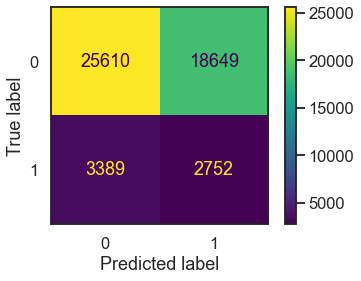

In [57]:
cm2 = confusion_matrix(Ytest, predictions2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()